# Analysis of the Freewar statistics

## Imports and Setup

In [1]:
from datetime import datetime
from pathlib import Path

import pandas as pd
from matplotlib import dates as mdates
from matplotlib import pyplot as plt
from matplotlib import ticker
from tqdm import tqdm

csv_path = Path.cwd() / 'FreewarStatistics.csv'

## Read the Data

In [2]:
csv_date_parser = lambda d: datetime.strptime(d, '%d.%m.%y %H:%M')
df = pd.read_csv(csv_path, parse_dates=['date'], date_parser=csv_date_parser)
(df.head(5))

,date,bank,stock,items_inventory,items_bank,total,xp,stock_pl
0,2016-04-19,210427,294108,189341,23865,724394,12294,0
1,2016-04-20,210771,279525,189922,26819,710992,12448,0
2,2016-04-21,211104,313813,188799,26699,749623,12482,0
3,2016-04-22,170437,287651,189167,27082,675284,12604,0
4,2016-04-23,170764,283226,190050,27632,675973,12654,0


## Plot XP

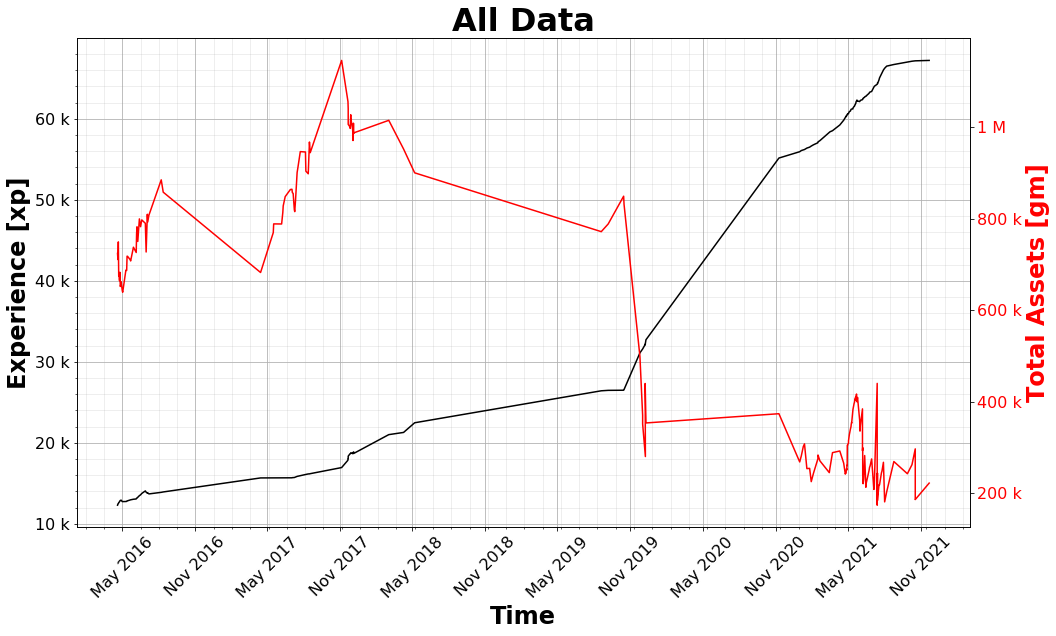

In [3]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot_date(df['date'], df['xp'], 'k-')

# grid
ax.grid()
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# text
ax.set_title('All Data', fontsize=32, fontweight='bold')
ax.set_xlabel('Time', fontsize=24, fontweight='bold')
ax.set_ylabel('Experience [xp]', fontsize=24, fontweight='bold')

# Add second y-axis
ax2 = ax.twinx()
ax2.plot_date(df['date'], df['total'], 'r-')
ax2.set_ylabel('Total Assets [gm]', color='red', fontsize=24, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

# format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=16)

# format y-axis
y_formatter = ticker.EngFormatter('')
ax.yaxis.set_major_formatter(y_formatter)
ax2.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

# white background for title and axes
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.7)

## Save the Figure

In [4]:
fig.savefig('FreewarStatistics.pdf', bbox_inches='tight')
fig.savefig('FreewarStatistics.svg', bbox_inches='tight')
fig.savefig('FreewarStatistics.png', dpi=600, bbox_inches='tight')
fig.savefig('FreewarStatistics_small.png', dpi=40, bbox_inches='tight')
print('Figure saved! ' + datetime.now().strftime('%d.%m.%Y %H:%M'))



Figure saved! 21.11.2021 18:59


## Plot years

plot years: 6it [00:00, 38.38it/s]


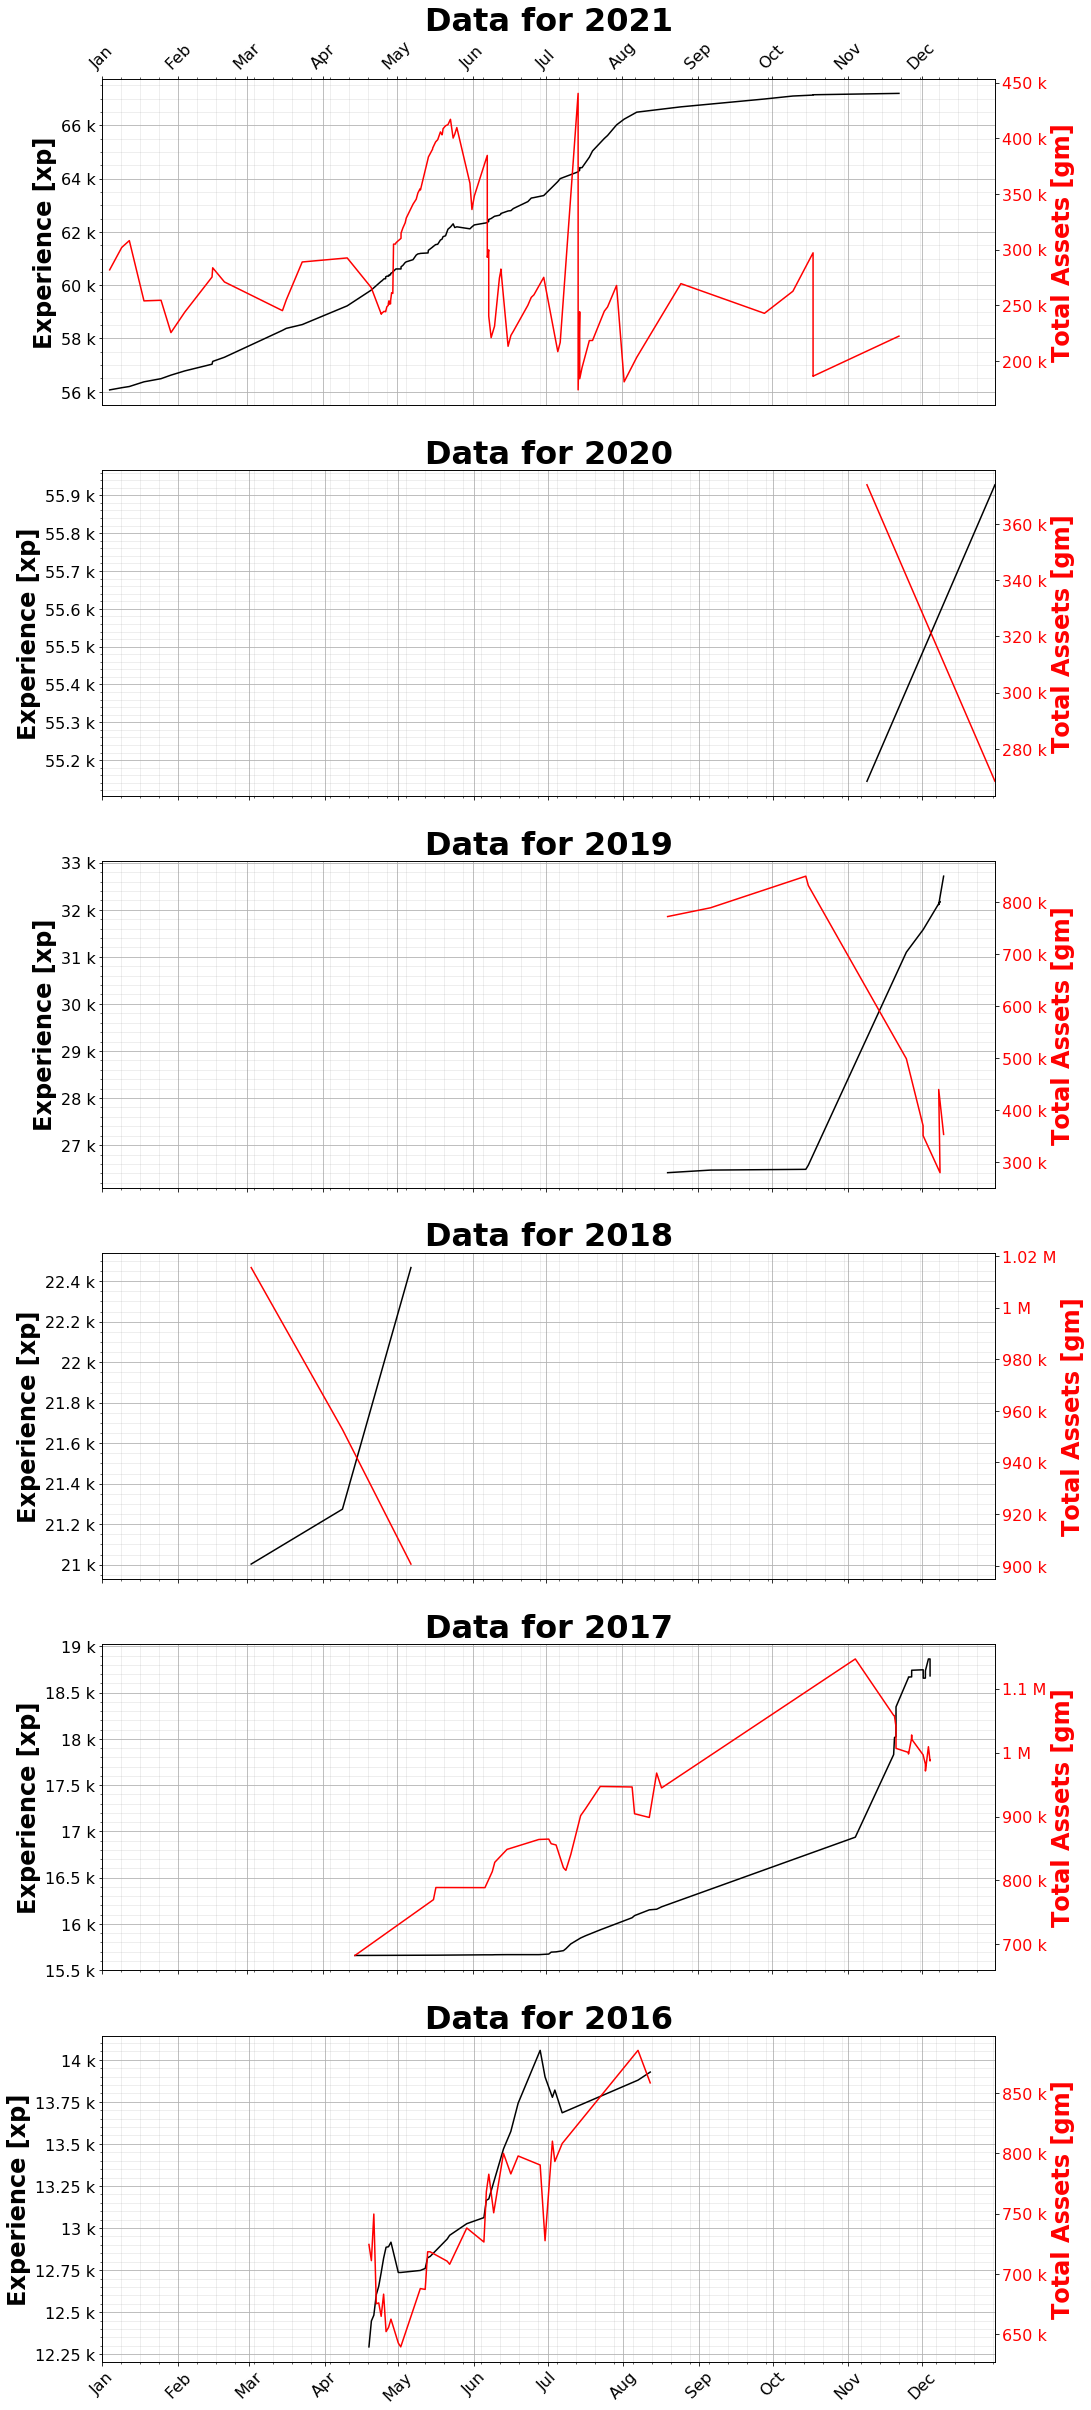

In [5]:
years = range(2016, datetime.now().year + 1)
fig, axs = plt.subplots(len(years), 1, figsize=(16, len(years) * 7))

i = -1
for year in tqdm(reversed(years), desc='plot years'):
    i += 1
    filtered = df[df['date'].dt.strftime('%Y') == str(year)]

    axs[i].plot_date(filtered['date'], filtered['xp'], 'k-')

    # grid
    axs[i].grid()
    axs[i].minorticks_on()
    axs[i].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # text
    axs[i].set_title(f'Data for {year}', fontsize=32, fontweight='bold')
    if year == years[-1]:
        axs[i].xaxis.tick_top()
        axs[i].xaxis.set_label_position('top')
    axs[i].set_ylabel('Experience [xp]', fontsize=24, fontweight='bold')

    # Add second y-axis
    ax2 = axs[i].twinx()
    ax2.plot_date(filtered['date'], filtered['total'], 'r-')
    ax2.set_ylabel('Total Assets [gm]', color='red', fontsize=24, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='red')

    # format x-axis
    axs[i].set_xlim([datetime(year, 1, 1), datetime(year, 12, 31)])
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    if year not in [years[0], years[-1]]:
        axs[i].xaxis.set_ticklabels([])
    axs[i].xaxis.set_tick_params(rotation=45)
    axs[i].xaxis.set_tick_params(labelsize=16)

    # format y-axis
    y_formatter = ticker.EngFormatter('')
    axs[i].yaxis.set_major_formatter(y_formatter)
    ax2.yaxis.set_major_formatter(y_formatter)
    axs[i].yaxis.set_tick_params(labelsize=16)
    ax2.yaxis.set_tick_params(labelsize=16)

# white background for title and axes
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.7)


## Save Figure

In [6]:
fig.savefig('FreewarStatistics_years.pdf', bbox_inches='tight')
fig.savefig('FreewarStatistics_years.svg', bbox_inches='tight')
fig.savefig('FreewarStatistics_years.png', dpi=600, bbox_inches='tight')
fig.savefig('FreewarStatistics_years_small.png', dpi=40, bbox_inches='tight')
